## Now You Code In Class: Tricks of The DataViz Masters

We will try something a bit different in the Activity - A series of Data Visualization coding challenges!

Penguins and health exp tips
       
    


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pandas as pd
import numpy as np
from IPython.display import display
from ipywidgets import interact_manual

## Let's load up some sample datasets:

- "penguins" The Palmer Penguins dataset: https://github.com/allisonhorst/palmerpenguins
- "tips" One waiter collected 244 data points about his tipping customers. https://rdrr.io/cran/reshape2/man/tips.html
- "healthexp" Life expectancy -vs- heath care expenditure. https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure

these are stored in Pandas dataframes. `pengo`, `health` and `tips` respectively.

In [3]:
pengo = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
health = sns.load_dataset("healthexp")
# add counts
pengo['count'] = 1
tips['count'] = 1

In [4]:
pengo.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
275,Gentoo,Biscoe,45.0,15.4,220.0,5050.0,Male,1
305,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,Male,1
209,Chinstrap,Dream,49.3,19.9,203.0,4050.0,Male,1
310,Gentoo,Biscoe,47.5,15.0,218.0,4950.0,Female,1
36,Adelie,Dream,38.8,20.0,190.0,3950.0,Male,1


In [5]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,count
166,20.76,2.24,Male,No,Sun,Dinner,2,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1,1
74,14.73,2.20,Female,No,Sat,Dinner,2,1
186,20.90,3.50,Female,Yes,Sun,Dinner,3,1
35,24.06,3.60,Male,No,Sat,Dinner,3,1


In [6]:
health.sample(5)

,Year,Country,Spending_USD,Life_Expectancy
122,1995,Japan,1413.445,79.6
32,1978,USA,808.884,73.5
111,1993,USA,3286.558,75.5
39,1980,France,659.826,74.3
136,1998,Canada,2200.468,78.6


## Bar Plots: Counts

This code displays the number of penguins by species. Which species is most represented in the data set?

<Axes: xlabel='species', ylabel='count'>

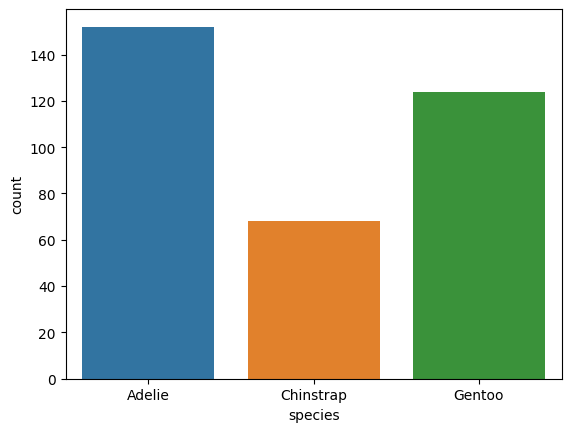

In [7]:
sns.barplot(data=pengo, x="species", y="count", hue="species", estimator="sum")

<Axes: xlabel='sex', ylabel='count'>

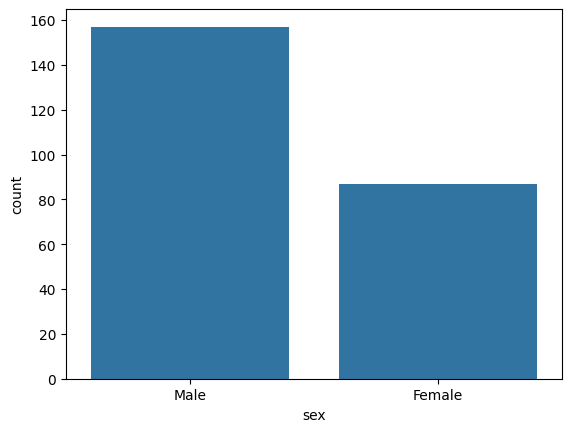

In [8]:
# PROMPT 1
# Are there more males or females in the tips dataset?
sns.barplot(data=tips, x="sex",y="count", estimator="sum")

<Axes: xlabel='smoker', ylabel='count'>

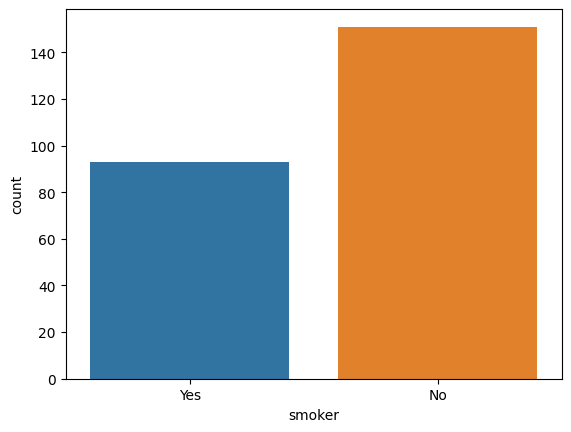

In [9]:
# PROMPT 2
# Are there more smokers or non-smokers in the tips dataset?
sns.barplot(data=tips, x="smoker", y="count", hue='smoker', estimator="sum")

## Bar Plots: Averages

This code displays the average penguin mass by species. The default `estimator='mean'`

<Axes: xlabel='species', ylabel='body_mass_g'>

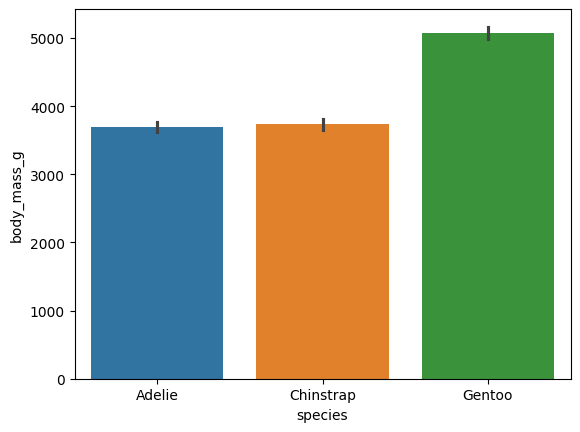

In [10]:
sns.barplot(data=pengo, x="species", y="body_mass_g", hue="species")

<Axes: xlabel='sex', ylabel='tip'>

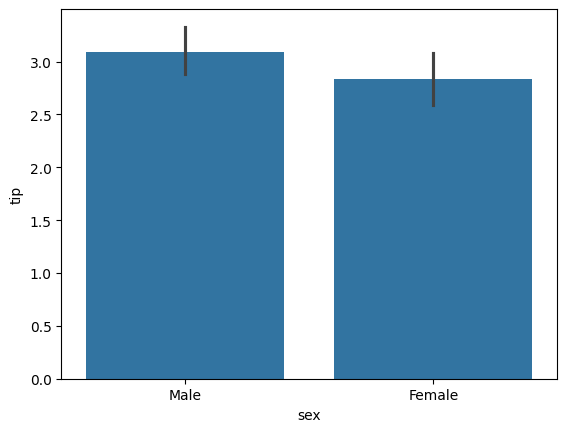

In [12]:
# PROMPT 3
# What is the average tip by gender?
sns.barplot(data=tips, x="sex", y="tip", estimator="mean")

<Axes: xlabel='smoker', ylabel='tip'>

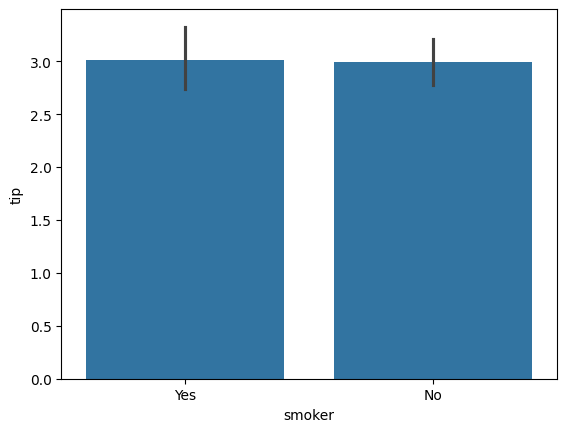

In [13]:
# PROMPT 4
# Who tips more smokers or non-smokers?
sns.barplot(data=tips, x="smoker", y="tip", estimator="mean")

## Adding a Series to a bar plot

This code breaks down the penguin species mass by island. Which island has the most penguins? which species is dominant on each island?

<Axes: xlabel='species', ylabel='count'>

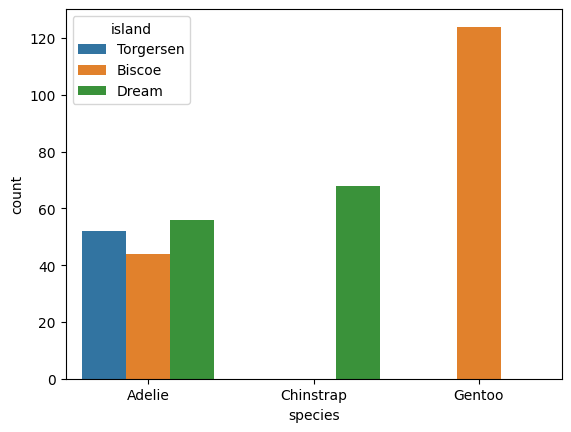

In [14]:
sns.barplot(data=pengo, x="species", y="count", hue="island", estimator="sum")

<Axes: xlabel='sex', ylabel='tip'>

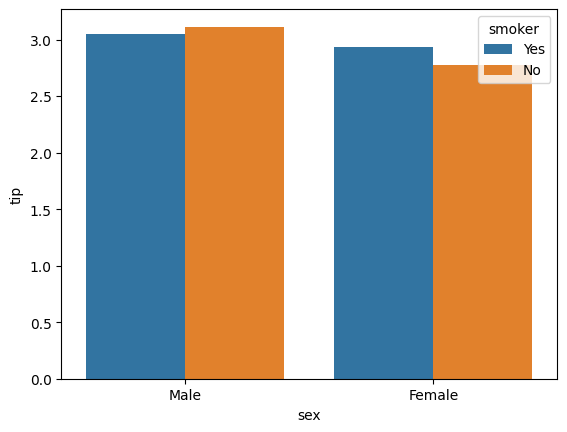

In [16]:
# PROMPT 5
# get a count of tips by sex and smoker
sns.barplot(data=tips, x="sex", y="tip", hue="smoker", errorbar=None)

<Axes: xlabel='day', ylabel='tip'>

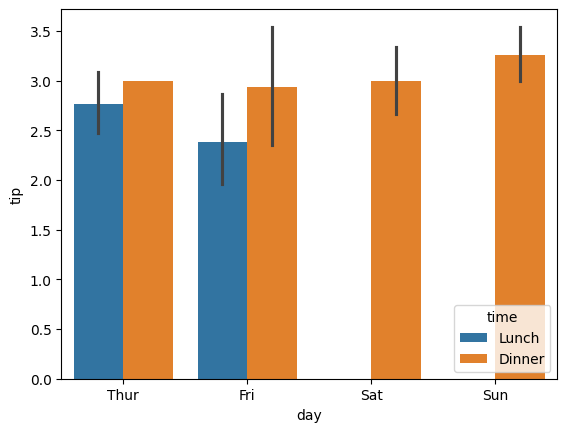

In [17]:
# PROMPT 6
# get a count of tips by day and time. Explain why the data appears as it does!
sns.barplot(data=tips, x="day", y="tip", hue="time")

In [18]:
pengo.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,Male,1


In [19]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size,count
242,17.82,1.75,Male,No,Sat,Dinner,2,1


## Scatter plots

What is the relationship between flipper length and bill length by species!

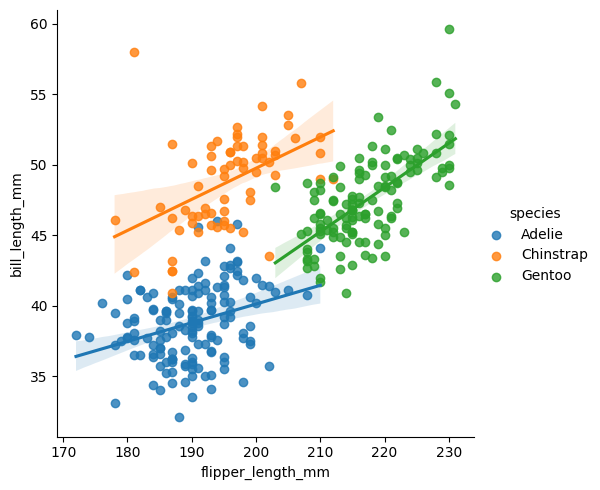

In [20]:
sns.lmplot(data=pengo, x="flipper_length_mm", y="bill_length_mm", hue="species")

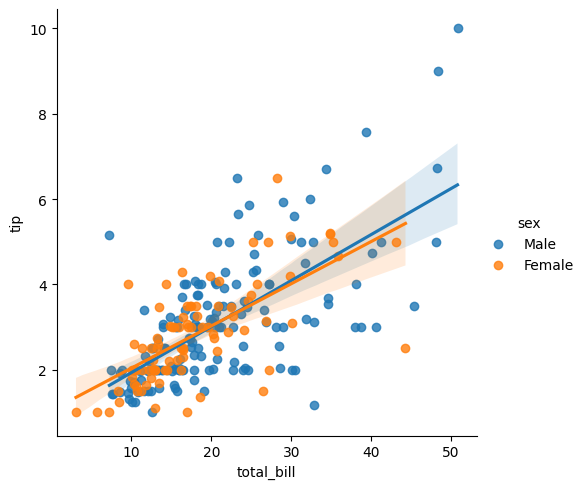

In [21]:
# PROMPT 7
# Show the relationship between bill and tip by gender
sns.lmplot(data=tips, x="total_bill", y="tip", hue="sex")

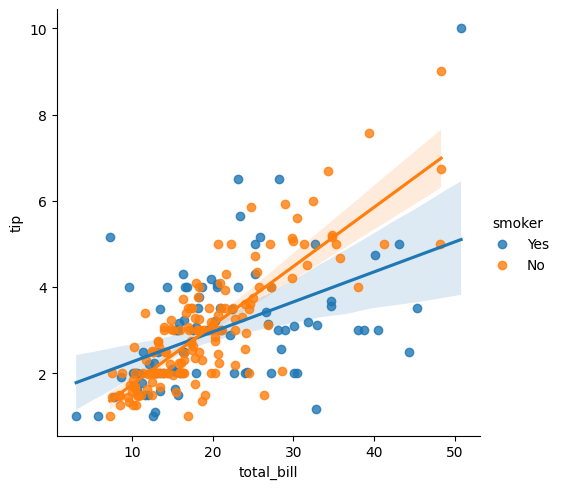

In [22]:
# PROMPT 8
# Show the relationship between bill and tip by smoker
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker")

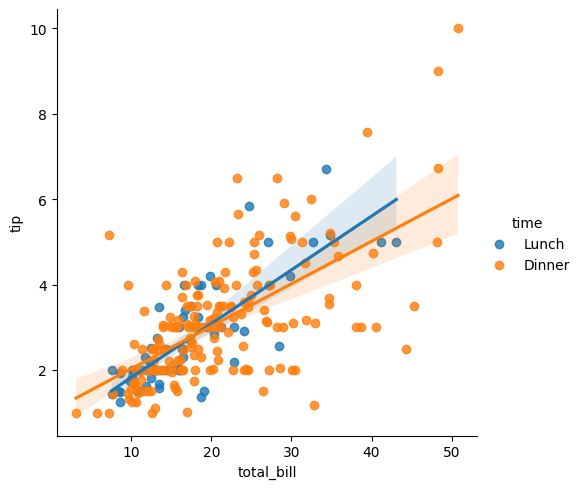

In [23]:
# PROMPT 9
# Show the relationship between bill and tip by lunch/dinner
sns.lmplot(data=tips, x="total_bill", y="tip", hue="time")

In [24]:
pengo.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
325,Gentoo,Biscoe,46.8,16.1,215.0,5500.0,Male,1


In [25]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size,count
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [26]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [28]:
tips[ tips['size'] == 1 ]

,total_bill,tip,sex,smoker,day,time,size,count
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1
82,10.07,1.83,Female,No,Thur,Lunch,1,1
111,7.25,1.00,Female,No,Sat,Dinner,1,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1,1


In [30]:
tips.sort_values("tip").tail(10)

,total_bill,tip,sex,smoker,day,time,size,count
88,24.71,5.85,Male,No,Thur,Lunch,2,1
239,29.03,5.92,Male,No,Sat,Dinner,3,1
47,32.40,6.00,Male,No,Sun,Dinner,4,1
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1
214,28.17,6.50,Female,Yes,Sat,Dinner,3,1
141,34.30,6.70,Male,No,Thur,Lunch,6,1
59,48.27,6.73,Male,No,Sat,Dinner,4,1
23,39.42,7.58,Male,No,Sat,Dinner,4,1
212,48.33,9.00,Male,No,Sat,Dinner,4,1
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1


In [31]:
tips['ratio'] =  tips['tip']  / tips['total_bill']

In [32]:
tips.sort_values('ratio').tail(10)

,total_bill,tip,sex,smoker,day,time,size,count,ratio
51,10.29,2.60,Female,No,Sun,Dinner,2,1,0.252672
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1,0.259314
93,16.32,4.30,Female,Yes,Fri,Dinner,2,1,0.263480
149,7.51,2.00,Male,No,Thur,Lunch,2,1,0.266312
109,14.31,4.00,Female,Yes,Sat,Dinner,2,1,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,1,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,1,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,1,0.710345


In [33]:
tips.describe()

,total_bill,tip,size,count,ratio
count,244.000000,244.000000,244.000000,244.0,244.000000
mean,19.785943,2.998279,2.569672,1.0,0.160803
std,8.902412,1.383638,0.951100,0.0,0.061072
min,3.070000,1.000000,1.000000,1.0,0.035638
25%,13.347500,2.000000,2.000000,1.0,0.129127
50%,17.795000,2.900000,2.000000,1.0,0.154770
75%,24.127500,3.562500,3.000000,1.0,0.191475
max,50.810000,10.000000,6.000000,1.0,0.710345


## Interact Example

This example allows the user to select two variables to compare from the following:

`['bill_length_mm;', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']`

it will then compare them using an `lmplot()` for each species. 


In [44]:
choices = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categories = ['species', 'island', 'sex']


@interact_manual(x=choices, y=choices, hue=categories)
def onclick(x, y, hue):
    sns.lmplot(data=pengo, x=x, y=y, hue=hue, markers="+")

interactive(children=(Dropdown(description='x', options=('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm…

### Prompt 10: Interact for tips

Among the following 4 Series:  

`['sex', 'smoker', 'day', 'time']`

Plot a bar of average tip `size`, allowing the user to choose which of the 4 series appears on the horizontal axis, and the other as part of the legend. Do not show the error bars


In [ ]:
sns.barplot(data=tips, x = choice, y="tip", estimator="mean")

In [36]:
# PROMPT 10
choices = ['sex', 'smoker', 'day', 'time']

@interact_manual(choice=choices)
def onclick(choice):
    sns.barplot(data=tips, x=choice, y="tip", estimator="mean")


interactive(children=(Dropdown(description='choice', options=('sex', 'smoker', 'day', 'time'), value='sex'), B…

## Timeseries Line Plots

Let's take another look at the `health` dataset. The last few challenges will use this dataset. Since it has a `Year` Series, it is suitable for line plots. 

In [37]:
health.sample(5)

,Year,Country,Spending_USD,Life_Expectancy
83,1988,USA,2195.392,74.9
17,1974,Japan,242.018,73.7
252,2017,France,5005.756,82.7
158,2001,Japan,1945.556,81.5
142,1999,Canada,2278.254,78.8


<Axes: xlabel='Year', ylabel='Life_Expectancy'>

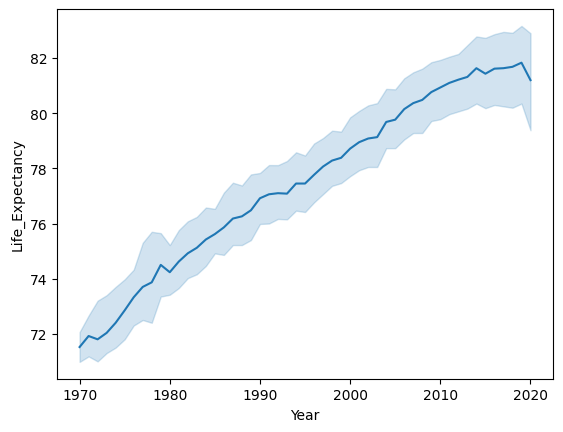

In [45]:
# PROMPT 11
# Plot average life expectancy for all countries by year
sns.lineplot(data=health, x="Year", y="Life_Expectancy", estimator="mean")

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

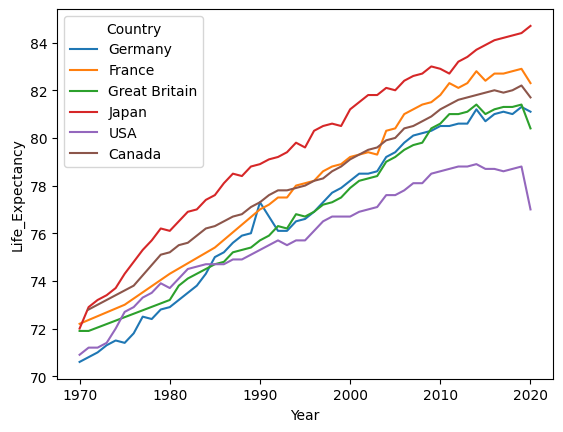

In [46]:
# PROMPT 12
# # Plot average life expectancy by year, broken our for each country as a legend
sns.lineplot(data=health, x="Year", y="Life_Expectancy", estimator="mean", hue="Country")

## Final Plot

Figure out the best way to plot this:

Compare life expectancy to Spending. Show each country in the legend

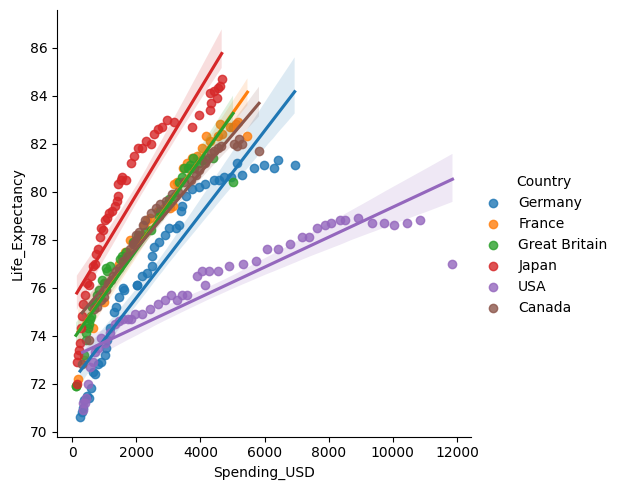

In [48]:
# PROMPT 13 Year	Country	Spending_USD	Life_Expectancy
sns.lmplot(data=health, y="Life_Expectancy", x="Spending_USD", hue="Country")

In [ ]:
# run this code to turn in your work!
from casstools.assignment import Assignment
Assignment().submit()